In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm,skew
from subprocess import check_output

# print(check_output(["ls"]).decode("utf8")) 



In [3]:

#load the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_ID = train['Id']
test_ID = test['Id']

pd.set_option('precision', 2)

In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### let's explore the outlines in the training data

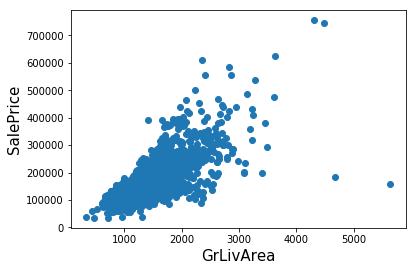

In [6]:
fix,ax = plt.subplots()
ax.scatter(train["GrLivArea"],train['SalePrice'])
plt.xlabel('GrLivArea',fontSize=15)
plt.ylabel('SalePrice',fontSize=15)
plt.show()

###### we can see the two outliers at the right bottom with extremly large area for low price. 
###### These are huge outliers, so we can remove it

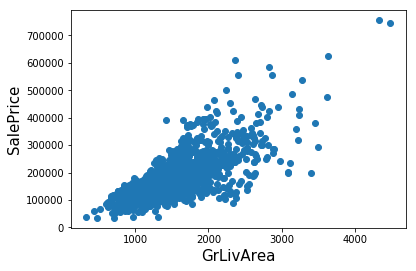

In [7]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']<300000)].index)
fig,ax = plt.subplots()
ax.scatter(train["GrLivArea"],train['SalePrice'])
plt.xlabel('GrLivArea',fontSize=15)
plt.ylabel('SalePrice',fontSize=15)
plt.show()

##### Let's discover the target variable graph

C:\Users\john\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

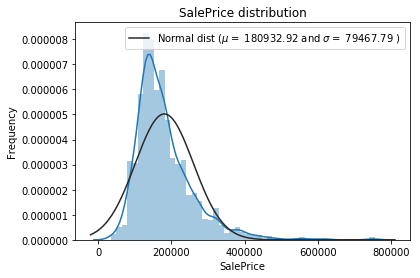

In [8]:
sns.distplot(train['SalePrice'] , fit=norm);
(mu,sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# As the target variabe is right skewed

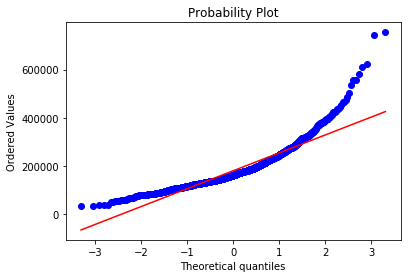

In [9]:
# QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

# we need to transform the target variable to normal distribution

C:\Users\john\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

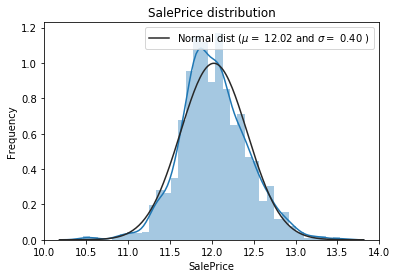

In [10]:
# Log transformation
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'] , fit=norm);
(mu,sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# corrected skewness

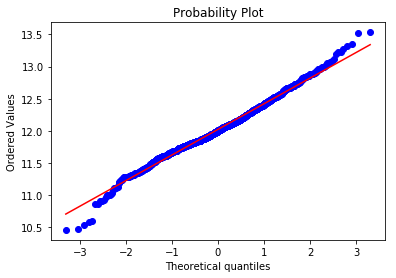

In [11]:
# QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

# Now the data appears normally distributed

In [12]:
#### Feature Engineering

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train =train.SalePrice.values
all_data = pd.concat((train,test),sort=False).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [14]:
all_missing_data = ((all_data.isnull().sum()/len(all_data)) * 100)
all_missing_data = all_missing_data[all_missing_data > 0].sort_values(ascending=False)


In [15]:
missing_data = pd.DataFrame({"missing ratio" :all_missing_data})
missing_data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'KitchenQual',
       'GarageCars', 'GarageArea', 'TotalBsmtSF'],
      dtype='object')

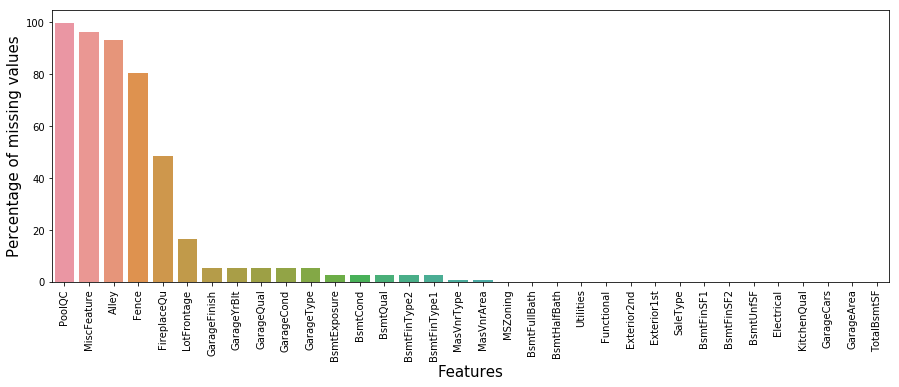

In [16]:
fig,ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation='90')
sns.barplot(x=all_missing_data.index,y=all_missing_data)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percentage of missing values',fontsize=15)
plt.show()


In [17]:
## Data correlation

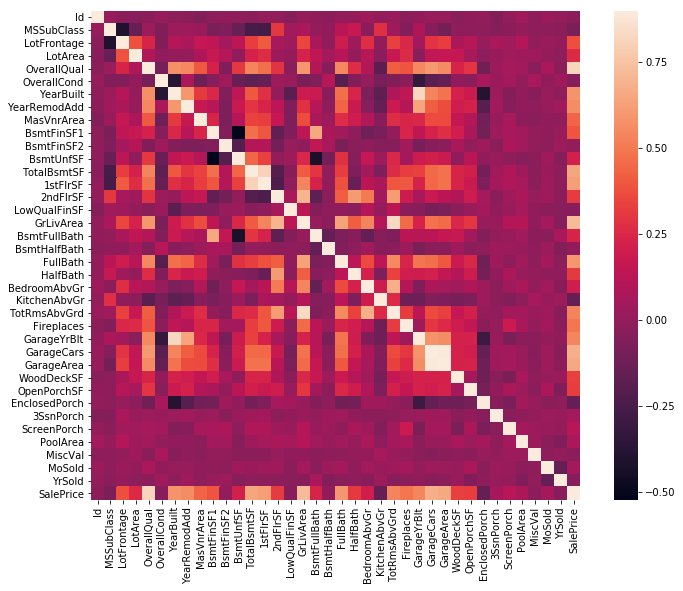

In [18]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)

In [19]:
### Handling missing values

In [20]:
####  PoolQC : NA means "No Pool". 
#### Majority of the house has no pool.

# MiscFeature : NA means "no misc feature"
# Alley : NA means "no alley access"
# Fence : NA means "no fence"
# FireplaceQu : NA means "no fireplace"
    

def fillNa(col,value):
    for val in col:
        all_data[col] = all_data[col].fillna(value)

fillNa(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],'None')
        

In [21]:
all_data.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
GarageArea         1
GarageCars         1
SaleType           1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
RoofMatl           0
                ... 
ExterQual          0
Heating            0
Foundation         0
HeatingQC          0
YrSold             0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolQC             0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive   

In [22]:
# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood ,
#  we can fill in missing values by the median LotFrontage of the neighborhood.

all_data["LotFrontage"] =  all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [23]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
fillNa(['GarageType','GarageFinish','GarageQual','GarageCond'],'None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
fillNa(['GarageYrBlt','GarageArea','GarageCars'],0)

In [24]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : 
# missing values are likely zero for having no basement
fillNa(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],0)

In [25]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :
# For all these categorical basement-related features, NaN means that there is no basement.

fillNa(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' , 'BsmtFinType2'],0)

In [26]:
# MasVnrArea and MasVnrType : 
# NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [27]:
# MSZoning (The general zoning classification) :
# 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . 
# Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

In [28]:
# Functional : NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

# Electrical : It has one NA value. 
# Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [29]:
# KitchenQual: Only one NA value, and same as Electrical,
# we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : 
# Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [30]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [31]:
# Transforming some numerical variables that are really categorical

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [32]:
all_data['MSSubClass'].unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40', '150'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


In [34]:
# Adding one more important feature

# Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [35]:
# Skewed features

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
all_data['SaleCondition'].head()


Skew in numerical features: 



0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [36]:
# Box Cox Transformation of (highly) skewed features

# We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

# Note that setting  λ=0  is equivalent to log1p used above for the target variable.

# See this page for more details on Box Cox Transformation as well as the scipy function's page

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 60 skewed numerical features to Box Cox transform


In [37]:
#Getting dummy categorical features

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 221)


In [38]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [71]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error
import xgboost as xgb
import lightgbm as lgb

In [107]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [76]:
## Base models


* Lasso Regression

In [77]:
lasso = make_pipeline(RobustScaler(),Lasso(alpha=0.00005,random_state=1))

* Elastic Regression

In [78]:
Enet = make_pipeline(RobustScaler(),ElasticNet(0.00005,random_state=1))

* Kernel Ridge Regression

In [79]:
krr = make_pipeline(RobustScaler(),KernelRidge(kernel='polynomial',alpha=0.6,degree=2,coef0=2.5))

* Gradient Boosting Regression

In [80]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [81]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [82]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [83]:
score = rmsle_cv(lasso)
print(" Lasso models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: 'mean_squared_log_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [84]:
score = rmsle_cv(Enet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: 'mean_squared_log_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [85]:
score = rmsle_cv(krr)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: 'mean_squared_log_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [86]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: 'mean_squared_log_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [87]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: 'mean_squared_log_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [53]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1157 (0.0051)



In [70]:
model_xgb.fit(train,y_train)
predictions = model_xgb.predict(test)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.expm1(predictions)
sub.to_csv('submission.csv',index=False)
print("done")

done


In [68]:
model_xgb.fit(train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [72]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred))

In [73]:
y_pred = model_lgb.predict(train)
print(rmsle(y_train,y_pred))

0.005611155818571663


In [74]:

y_pred = model_xgb.predict(train)
print(rmsle(y_train,y_pred))

0.006080914206402014


#### stacking model

In [120]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [115]:
reg = StackingModel(models = (lasso,Enet,krr))

In [116]:
reg.fit(train,y_train)

C:\Users\john\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09367983779950606, tolerance: 0.02327853920138023
  positive)


In [117]:
reg.predict(test)

array([11.69520052, 11.98648769, 12.12402167, ..., 12.08183927,
       11.65349836, 12.31102789])

In [122]:
print(np.mean(rmsle_cv( AveragingModels(models = (lasso,Enet,krr)))))

C:\Users\john\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06616261625710784, tolerance: 0.018911334381783333
  positive)
C:\Users\john\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12205239108986454, tolerance: 0.01799695208485427
  positive)
C:\Users\john\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.049497215066717004, tolerance: 0.01837208344628373
  positive)
C:\Users\john\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

0.11496134481157413
